In [17]:
%run talktools
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import Image, display 

<h1><div align='left'> Open Source can improve current scientific practice</div></h1>

<h3>Ipython notebooks are a great tool to support this</h3>
**Sophie Balemans** and **Stijn Van Hoey**

*EGU 2015 - PICO session on Open Source Computing in Hydrology*

# The ideals of (hydrological) science

* Provide verifiable answers about water and solutions to water-related problems.
* The validation of these results by reproduction.
* An altruistic, collective enterprise for humanity's benefit

*F Perez*

# The <span class="strike">ideals</span> reality of (hydrological) science

* <span class="strike">Provide verifiable answers about water and solutions to water-related problems.</span>
 - **The pursuit of highly cited papers for your CV.**
* <span class="strike">The validation of our results by reproduction.</span>
 - **Validation by convincing journal referees who didn't see your code or data.**
* <span class="strike">An altruistic, collective enterprise  for humanity's benefit.</span>
 - **A deadly race to outrun your colleagues in front of the bear of funding.**

*F Perez*

# Free and Open Source Software (FOSS) in this context

* <span class="emph">Open, collaborative by definition.</span>
  - Industrial competition can coexist...
  
* <span class="emph">Continuous</span>, public process.
  - Distributed credit.
  - Open peer review.

* <span class="emph">Reproducible by necessity.</span>

* <span class="emph">Public bug tracking.</span>

* The use of <span class="emph">licenses</span> is essential ([CC, BSD, GPL,...](http://choosealicense.com/))

*F Perez*

# FOSS $\neq$ free work
<center><img src="figs/workfree.png" width="70%"></center>

# All waiting for the developer...

<center><img src="figs/crowd.jpg" width="70%"></center>

<div class="center"><h2>...or all developers?</h2></div>

# Graveyard of good intentions
<center><img src="figs/graveyard.jpg" width="70%"></center>

# Towards *continuous* and *collaborative*

What do we need:

* <span class="emph">Training</span>  of students, Phds,... <br>*Creating a future generation of scientists with reproducibility as default*<br> Provide version control, script-based development, database management... in the curricula
*  <span class="emph">Continuous funding</span>  of open source development<br>*Payed to maintain and develop open source projects*
* <span class="emph">Tools</span> that facilitate a reproducible workflow<br>*[knitr](http://yihui.name/knitr/), [Ipython Notebook](http://ipython.org/notebook.html), [git](http://git-scm.com/), [RunMyCode](http://www.runmycode.org/), [VIStrails](http://www.vistrails.org), [Authorea](https://www.authorea.com),...*


<div class="center"><h2>Ipython Notebook</h2></div>

# Reproducible science

* Reproducibility <span class="emph">at publication time?</span>  is **TOO late!**

We need to embed the <span class="emph">entire lifecycle</span> of a scientific idea:

1. exploratory stuff
2. (collaborative) development
3. production (simulations on HPC, data visualisation,...)
4. publication (with <span class="warn">reproducible</span> results)
5. teach about it
6. Go back to 1.

**Ipython (Jupyter!) Notebook** can support on the different levels

**Ipython (Jupyter!) Notebook...** (*this is a notebook!*)

<div class="center"><h3>Minimize effort between analysis and sharing</h3></div>

<center><img src="figs/IPynbWorkflows.png" width="70%"></center>

* Interactive shell for data-analysis and exploration
* Interaction between languages (R, Julia,...)
* Parallel computing
* ipynb to latex, pdf, html, html,slides, publications, books,...
* Loading of images, websites, widgets,...
* ...

Check it out on https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks

# Scripts, so it can be *version controlled!*
<center><img src="figs/version-control.jpg" width="70%"></center>

# Recap *5. teach about it*

* The same file can be used to do analysis, create course notes and retrieve slides using <span class="emph">nbconvert</span>
* Students can <span class="emph">interactively</span> work on their notebook
* Different useful <span class="emph">features</span>: eg. 
<div class="center"><h2>interactive widgets</h2></div>

# Case : <br>
# Interactive model evaluation tool


- Interactive environment
    - model performance evaluation
    - explore the parameter space
    - Get insights in the model structural behaviour
- Application not restricted to hydrological models 



# General conceptual rainfall-runoff model
- Transforms rainfall and evaporation data to flow at the catchment outlet
- Spatially varying soil storage capacacity

<br/>

<center><img src="figs/PDM_adapted.png" width="60%"></center>




<span class="emph"> </h3>Load parametersets, model simulation results and a data set with observations</h3> </span> 

In [18]:
pars =pd.read_csv('data/example2_PDM_parameters.txt',header=0, sep=',', index_col=0)
measured = pd.read_csv('data/example_PDM_measured.txt', header=0, sep='\t', decimal='.', index_col=0)
modelled = pd.read_csv('data/example2_PDM_outputs.txt',header=0, sep=',', index_col=0).T

In [9]:
from scatter_hist2 import create_scatterhist, create_seasonOF

names = pars.columns
time=np.array(measured.index)
modelled.index = time

pars_name={}
for i in range(0, names.size):
    pars_name[names[i]]=i

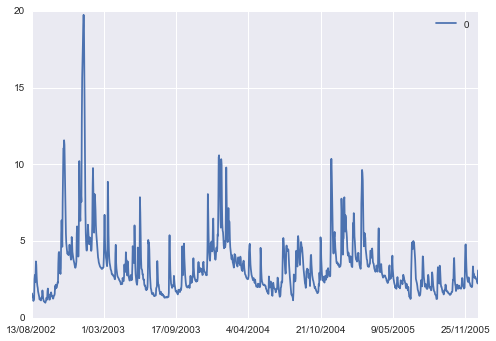

In [13]:
fig = measured.plot()

<span class="emph"> Load extern function: create_scatterhist </span> <br>
(= backbone of the interactive tool) 

In [14]:
from scatter_hist2 import create_scatterhist

In [21]:
#objective_functions = create_seasonOF(modelled, measured)
#pd.Dataframe(objective_functions)

```
create_scatterhist(
       all_parameters=pars, parameter1='be', parameter2='b',
       objective=objective,
       pars_names=names,
       xbinwidth = 0.05, ybinwidth = 0.05,
       objective_function='RMSE',
       colormaps = 'red_yellow_green' ,
       threshold = 0.4, 
       season='Winter')         
```

- Split in behavioural and non-behavioural parametersets based on a selected 
    1. Objective function (SSE, RMSE, RRMSE)
    2. Time period of interest (whole year or specific season) 
    3. Threshold 
- Visualisation of a 2D parameter reponse surface of behavioural parametersets


<center><img src="figs/example2_04.png" width="60%"></center>

<span class="emph"> Make the function interactive using widgets </span> 
- Dropdownlists and a slider enables the user to change the settings interactively
- Gaining insight in **model structural behaviour** and the impact of different setting on the final optimal parameterset

To use the widget framework, you need to import IPython.html.widgets

In [22]:
from IPython.html.widgets import interact, fixed

 
```
i = interact(create_scatterhist,
             all_parameters=fixed(pars),
             parameter1=pars_name,
             parameter2=pars_name,
             objective=fixed(objective),
             pars_names=fixed(names),
             objective_function=(['SSE',
                                 'RMSE',
                                 'RRMSE']),
             colormaps = (['red_yellow_green', 
                           'yellow_orange_brown',
                           'blue_green']) ,
             threshold = (0,1,0.005), 
             season=('Winter','Summer','Spring',
                     'Autumn','All season'))
```

<center><img src="figs/example2_winter_boven.png" width="60%"></center>
<center><img src="figs/example2_04.png" width="50%"></center>

# Ipython Notebook

* Reuse scientific functionalities as interactive learning objects

* [Github Stijn Van Hoey](github.com/stijnvanhoey)
stvhoey.vanhoey@ugent.be

* [Github Sophie](github.com/sbalemans)
sophie.balemans@ugent.be

* [Github university](github.ugent.be/biomath)